In [1]:
import pandas as pd
import numpy as np
import os
import sklearn as skl
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Load dataset in to DataFrame

brain_df = pd.read_csv("Resources/healthcare-dataset-stroke-data.csv")
brain_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Delete id column

brain_df.drop(columns=["id"], inplace=True)
brain_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
brain_df.count()

gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [5]:
# Delete rows which BMI has NA values

brain_df = brain_df.dropna()
brain_df.count()


gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
Residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [6]:
ohe = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(ohe.fit_transform(brain_df.gender.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = ohe.get_feature_names(['gender'])
encode_df.head()

C:\Users\bbert\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,gender_Female,gender_Male,gender_Other
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [7]:
# Merge the two DataFrames together and drop the Country column
brain_df = brain_df.merge(encode_df,left_index=True,right_index=True).drop("gender",1)
brain_df.head()

C:\Users\bbert\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other
0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0.0,1.0,0.0
2,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1.0,0.0,0.0
3,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1.0,0.0,0.0
4,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0.0,1.0,0.0
5,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,0.0,1.0,0.0


In [8]:
# Fit the encoder and produce encoded DataFrame
encode_df2 = pd.DataFrame(ohe.fit_transform(brain_df.ever_married.values.reshape(-1,1)))

# Rename encoded columns
encode_df2.columns = ohe.get_feature_names(['ever_married'])
encode_df2.head()

C:\Users\bbert\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ever_married_No,ever_married_Yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [9]:
brain_df = brain_df.merge(encode_df2,left_index=True,right_index=True).drop("ever_married",1)
brain_df.head()

C:\Users\bbert\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes
0,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,0.0,1.0,0.0,0.0,1.0
2,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,1.0,0.0,0.0,0.0,1.0
3,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,0.0,1.0,0.0,0.0,1.0
5,81.0,0,0,Private,Urban,186.21,29.0,formerly smoked,1,0.0,1.0,0.0,0.0,1.0


In [10]:
# Fit the encoder and produce encoded DataFrame
encode_df3 = pd.DataFrame(ohe.fit_transform(brain_df.work_type.values.reshape(-1,1)))

# Rename encoded columns
encode_df3.columns = ohe.get_feature_names(['work_type'])
encode_df3.head()

C:\Users\bbert\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [11]:
brain_df = brain_df.merge(encode_df3,left_index=True,right_index=True).drop("work_type",1)
brain_df.head()

C:\Users\bbert\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,67.0,0,1,Urban,228.69,36.6,formerly smoked,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,80.0,0,1,Rural,105.92,32.5,never smoked,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,49.0,0,0,Urban,171.23,34.4,smokes,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,79.0,1,0,Rural,174.12,24.0,never smoked,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,81.0,0,0,Urban,186.21,29.0,formerly smoked,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [12]:
# Fit the encoder and produce encoded DataFrame
encode_df4 = pd.DataFrame(ohe.fit_transform(brain_df.Residence_type.values.reshape(-1,1)))

# Rename encoded columns
encode_df4.columns = ohe.get_feature_names(['Residence_type'])
encode_df4.head()

C:\Users\bbert\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Residence_type_Rural,Residence_type_Urban
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [13]:
brain_df = brain_df.merge(encode_df4,left_index=True,right_index=True).drop("Residence_type",1)
brain_df.head()

C:\Users\bbert\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,228.69,36.6,formerly smoked,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,80.0,0,1,105.92,32.5,never smoked,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,49.0,0,0,171.23,34.4,smokes,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,79.0,1,0,174.12,24.0,never smoked,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,81.0,0,0,186.21,29.0,formerly smoked,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [14]:
# Fit the encoder and produce encoded DataFrame
encode_df5 = pd.DataFrame(ohe.fit_transform(brain_df.smoking_status.values.reshape(-1,1)))

# Rename encoded columns
encode_df5.columns = ohe.get_feature_names(['smoking_status'])
encode_df5.head()

C:\Users\bbert\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0


In [15]:
brain_df = brain_df.merge(encode_df5,left_index=True,right_index=True).drop("smoking_status",1)
brain_df.head()

C:\Users\bbert\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,80.0,0,1,105.92,32.5,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,79.0,1,0,174.12,24.0,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,81.0,0,0,186.21,29.0,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [16]:
#Rename columns

brain_df.rename(columns={"work_type_Govt_job":"govt_worker","work_type_Never_worked":"never_worked",
                         "work_type_Private":"private_worker", "work_type_Self-employed":"self_employed",
                         "work_type_children": "minor_unemployed"}, inplace=True)

brain_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,never_worked,private_worker,self_employed,minor_unemployed,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,80.0,0,1,105.92,32.5,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,79.0,1,0,174.12,24.0,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,81.0,0,0,186.21,29.0,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [17]:
#Rename columns cont'd

brain_df.rename(columns={"Residence_type_Rural": "rural_residence", "Residence_type_Urban": "urban_residence", 
                        "smoking_status_Unknown":"smoking_unknown", "smoking_status_formerly smoked":"former_smoker",
                        "smoking_status_never smoked": "never_smoked", "smoking_status_smokes":"current_smoker"}, inplace=True)

brain_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,never_worked,private_worker,self_employed,minor_unemployed,rural_residence,urban_residence,smoking_unknown,former_smoker,never_smoked,current_smoker
0,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,80.0,0,1,105.92,32.5,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,79.0,1,0,174.12,24.0,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,81.0,0,0,186.21,29.0,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [18]:
#Create DataFrame with persons who are 18yrs and older

adult_df_ohe = brain_df[(brain_df["age"]>17)]

adult_df_ohe

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,never_worked,private_worker,self_employed,minor_unemployed,rural_residence,urban_residence,smoking_unknown,former_smoker,never_smoked,current_smoker
0,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,80.0,0,1,105.92,32.5,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,79.0,1,0,174.12,24.0,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,81.0,0,0,186.21,29.0,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,55.0,0,0,73.57,28.0,0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4153,79.0,1,0,72.04,23.6,0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4154,49.0,0,0,125.63,57.2,0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4155,53.0,1,0,77.94,33.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Second attempt at machine learning model using binning

In [19]:
adult_df_ohe['age'].dtype

dtype('float64')

In [20]:
age_counts = adult_df_ohe.age.value_counts()
age_counts

57.0    80
78.0    78
52.0    75
50.0    71
53.0    69
        ..
72.0    35
19.0    35
70.0    34
77.0    34
74.0    34
Name: age, Length: 65, dtype: int64

<AxesSubplot:ylabel='Density'>

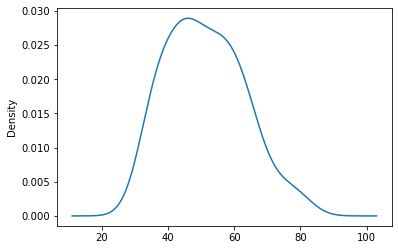

In [21]:
age_counts.plot.density()

In [22]:
for age in adult_df_ohe['age']:
    if age < 40:
        adult_df_ohe.age = adult_df_ohe.age.replace(age, "Under 40")
    elif (age >= 40) & (age < 60):
        adult_df_ohe.age = adult_df_ohe.age.replace(age, "40-59")
    else:
        adult_df_ohe.age = adult_df_ohe.age.replace(age, "60 or Older")
        
adult_df_ohe.age.value_counts()

C:\Users\bbert\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


40-59          1231
60 or Older    1077
Under 40       1019
Name: age, dtype: int64

In [23]:
glucose_counts = adult_df_ohe.avg_glucose_level.value_counts()
glucose_counts

114.32    4
72.49     4
86.06     4
73.00     4
91.85     4
         ..
62.78     1
103.25    1
126.99    1
108.08    1
68.99     1
Name: avg_glucose_level, Length: 2859, dtype: int64

<AxesSubplot:ylabel='Density'>

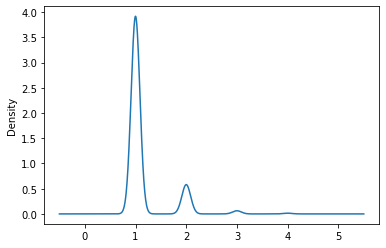

In [24]:
glucose_counts.plot.density()

In [25]:
print(min(adult_df_ohe.avg_glucose_level))
print(max(adult_df_ohe.avg_glucose_level))

55.22
271.74


In [26]:
adult_df_ohe

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,never_worked,private_worker,self_employed,minor_unemployed,rural_residence,urban_residence,smoking_unknown,former_smoker,never_smoked,current_smoker
0,60 or Older,0,1,228.69,36.6,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,60 or Older,0,1,105.92,32.5,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,40-59,0,0,171.23,34.4,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,60 or Older,1,0,174.12,24.0,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,60 or Older,0,0,186.21,29.0,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,40-59,0,0,73.57,28.0,0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4153,60 or Older,1,0,72.04,23.6,0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4154,40-59,0,0,125.63,57.2,0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4155,40-59,1,0,77.94,33.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [27]:
#Apply OHE to "age" 

# Fit the encoder and produce encoded DataFrame
encode_df_age = pd.DataFrame(ohe.fit_transform(adult_df_ohe.age.values.reshape(-1,1)))

# Rename encoded columns
encode_df_age.columns = ohe.get_feature_names(['age'])
encode_df_age.head()

C:\Users\bbert\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,age_40-59,age_60 or Older,age_Under 40
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [28]:
adult_df_ohe = adult_df_ohe.merge(encode_df_age,left_index=True,right_index=True).drop("age",1)
adult_df_ohe

C:\Users\bbert\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,minor_unemployed,rural_residence,urban_residence,smoking_unknown,former_smoker,never_smoked,current_smoker,age_40-59,age_60 or Older,age_Under 40
0,0,1,228.69,36.6,1,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,1,105.92,32.5,1,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0,0,171.23,34.4,1,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,0,174.12,24.0,1,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0,0,186.21,29.0,1,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,1,1,220.64,30.0,0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3320,0,0,69.53,26.2,0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3322,0,0,83.93,25.6,0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3325,0,0,112.54,23.4,0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [29]:
# Look at glucose column for binning
glucose_counts = adult_df_ohe.avg_glucose_level.value_counts()
glucose_counts

92.82     4
72.49     4
73.00     4
97.06     3
114.32    3
         ..
93.34     1
195.16    1
246.34    1
96.63     1
83.93     1
Name: avg_glucose_level, Length: 2372, dtype: int64

array([[<AxesSubplot:title={'center':'avg_glucose_level'}>]], dtype=object)

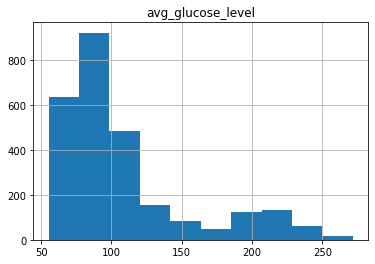

In [30]:


adult_df_ohe.hist(column="avg_glucose_level")

In [31]:
# Bin glucose column

for lvl in adult_df_ohe['avg_glucose_level']:
    if lvl < 75:
        adult_df_ohe.avg_glucose_level = adult_df_ohe.avg_glucose_level.replace(lvl, "Under 75")
    elif (lvl >= 75) & (lvl < 140):
        adult_df_ohe.avg_glucose_level = adult_df_ohe.avg_glucose_level.replace(lvl, "75-140")
    else:
        adult_df_ohe.avg_glucose_level = adult_df_ohe.avg_glucose_level.replace(lvl, "Over 140")
        
adult_df_ohe.avg_glucose_level.value_counts()


75-140      1615
Under 75     571
Over 140     485
Name: avg_glucose_level, dtype: int64

In [32]:
adult_df_ohe

,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,minor_unemployed,rural_residence,urban_residence,smoking_unknown,former_smoker,never_smoked,current_smoker,age_40-59,age_60 or Older,age_Under 40
0,0,1,Over 140,36.6,1,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,1,75-140,32.5,1,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0,0,Over 140,34.4,1,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,0,Over 140,24.0,1,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0,0,Over 140,29.0,1,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,1,1,Over 140,30.0,0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3320,0,0,Under 75,26.2,0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3322,0,0,75-140,25.6,0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3325,0,0,75-140,23.4,0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [33]:
#Apply OHE to Glucose column

# Fit the encoder and produce encoded DataFrame
encode_df_glu = pd.DataFrame(ohe.fit_transform(adult_df_ohe.avg_glucose_level.values.reshape(-1,1)))

# Rename encoded columns
encode_df_glu.columns = ohe.get_feature_names(['avg_glucose_level'])
encode_df_glu.head()

C:\Users\bbert\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,avg_glucose_level_75-140,avg_glucose_level_Over 140,avg_glucose_level_Under 75
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [34]:
adult_df_ohe = adult_df_ohe.merge(encode_df_glu,left_index=True,right_index=True).drop("avg_glucose_level",1)
adult_df_ohe

C:\Users\bbert\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,hypertension,heart_disease,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,govt_worker,...,smoking_unknown,former_smoker,never_smoked,current_smoker,age_40-59,age_60 or Older,age_Under 40,avg_glucose_level_75-140,avg_glucose_level_Over 140,avg_glucose_level_Under 75
0,0,1,36.6,1,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,1,32.5,1,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,0,34.4,1,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,0,24.0,1,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0,0,29.0,1,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,0,0,21.0,0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2666,1,0,28.9,0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2668,0,0,28.0,0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2669,0,0,29.6,0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [35]:
adult_df_ohe.bmi.value_counts()

26.7    24
27.7    24
28.1    23
27.3    20
26.4    18
        ..
50.6     1
48.4     1
44.6     1
37.7     1
14.2     1
Name: bmi, Length: 338, dtype: int64

<AxesSubplot:ylabel='Density'>

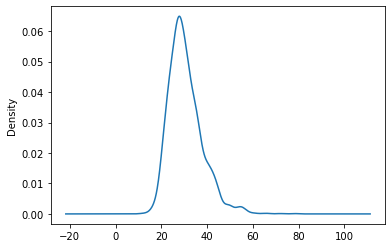

In [36]:
adult_df_ohe.bmi.plot.density()

In [37]:
# Bin BMI column

for lvl in adult_df_ohe['bmi']:
    if lvl < 30:
        adult_df_ohe.bmi = adult_df_ohe.bmi.replace(lvl, "Not Obese")
    else:
        adult_df_ohe.bmi = adult_df_ohe.bmi.replace(lvl, "Obese")
        
adult_df_ohe.bmi.value_counts()

Not Obese    1157
Obese         993
Name: bmi, dtype: int64

In [38]:
adult_df_ohe

,hypertension,heart_disease,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,govt_worker,...,smoking_unknown,former_smoker,never_smoked,current_smoker,age_40-59,age_60 or Older,age_Under 40,avg_glucose_level_75-140,avg_glucose_level_Over 140,avg_glucose_level_Under 75
0,0,1,Obese,1,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,1,Obese,1,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,0,Obese,1,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,0,Not Obese,1,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0,0,Not Obese,1,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,0,0,Not Obese,0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2666,1,0,Not Obese,0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2668,0,0,Not Obese,0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2669,0,0,Not Obese,0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [39]:
# Apply OHE to bmi column

# Fit the encoder and produce encoded DataFrame
encode_df_bmi = pd.DataFrame(ohe.fit_transform(adult_df_ohe.bmi.values.reshape(-1,1)))

# Rename encoded columns
encode_df_bmi.columns = ohe.get_feature_names(['bmi'])
encode_df_bmi.head()

C:\Users\bbert\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bmi_Not Obese,bmi_Obese
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [40]:
adult_df_ohe = adult_df_ohe.merge(encode_df_bmi,left_index=True,right_index=True).drop("bmi",1)
adult_df_ohe

C:\Users\bbert\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,hypertension,heart_disease,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,govt_worker,never_worked,...,never_smoked,current_smoker,age_40-59,age_60 or Older,age_Under 40,avg_glucose_level_75-140,avg_glucose_level_Over 140,avg_glucose_level_Under 75,bmi_Not Obese,bmi_Obese
0,0,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2144,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2145,0,0,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2147,0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [41]:
adult_df_ohe.to_csv("Resources/adult_OHE.csv", index = False, header=True)

In [42]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [43]:
#Create our features

X = adult_df_ohe.drop(columns=["stroke"])
y = adult_df_ohe["stroke"]

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [46]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=52, activation="relu", input_dim=26))
nn_model.add(tf.keras.layers.Dense(units=52, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
41/41 [==============================] - 3s 3ms/step - loss: 0.4086 - accuracy: 0.8742
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.3369 - accuracy: 0.8804
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.3158 - accuracy: 0.8819
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.3024 - accuracy: 0.8842
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.2972 - accuracy: 0.8880
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.2909 - accuracy: 0.8880
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.2905 - accuracy: 0.8911
Epoch 8/100
41/41 [==============================] - 0s 3ms/step - loss: 0.2839 - accuracy: 0.8942
Epoch 9/100
41/41 [==============================] - 0s 3ms/step - loss: 0.2818 - accuracy: 0.8911
Epoch 10/100
41/41 [==============================] - 0s 3ms/step - loss: 0.2803 - accuracy: 0.8919
Epoch 11/

41/41 [==============================] - 0s 2ms/step - loss: 0.1261 - accuracy: 0.9448
Epoch 84/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1267 - accuracy: 0.9433
Epoch 85/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1271 - accuracy: 0.9425
Epoch 86/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1267 - accuracy: 0.9471
Epoch 87/100
41/41 [==============================] - 0s 4ms/step - loss: 0.1236 - accuracy: 0.9448
Epoch 88/100
41/41 [==============================] - 0s 4ms/step - loss: 0.1237 - accuracy: 0.9448
Epoch 89/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1261 - accuracy: 0.9363
Epoch 90/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1271 - accuracy: 0.9433
Epoch 91/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1262 - accuracy: 0.9425
Epoch 92/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1250 - accuracy: 0.9402
Epoch 93/100


In [48]:
# Evaluate the model using the test data

model_loss, model_accuracy = nn_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

14/14 - 1s - loss: 0.5160 - accuracy: 0.8391 - 955ms/epoch - 68ms/step
Loss: 0.5160161256790161, Accuracy: 0.8390804529190063
